In [19]:
import numpy as np
import pandas as pd
import os
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
from datetime import datetime

In [5]:
"""
files = os.listdir('data')
dct = dict()
for file in files:
    path = os.path.join('data', file)
    df = pd.read_csv(path)
    dct[file] = df.shape
    print(df.head())

print(dct)
"""

"\nfiles = os.listdir('data')\ndct = dict()\nfor file in files:\n    path = os.path.join('data', file)\n    df = pd.read_csv(path)\n    dct[file] = df.shape\n    print(df.head())\n\nprint(dct)\n"

In [6]:
path = 'data/birth_year.csv'
df_birthyear = pd.read_csv(path)
df_birthyear.sort_values(by="birth_year", ascending=True, inplace=True)
df_birthyear.head()

,auhtor_ID,post,birth_year
28446,t2_9v6260me,a trope among this sub and almost everyone joi...,1948
28445,t2_9v6260me,door question” decorated with an extreme helpi...,1948
28444,t2_9v6260me,"Unless you live at home, why would you put up ...",1948
28456,t2_9v6260me,my mind) any possibility of another religion b...,1948
28457,t2_9v6260me,and our mental health is linked to our physica...,1948


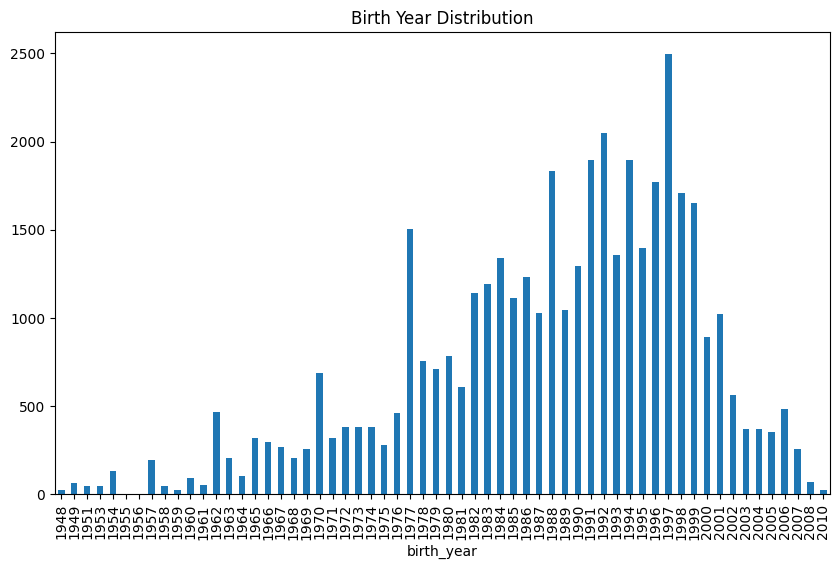

In [7]:
# plot a piechart with birth years
df_count = df_birthyear.value_counts('birth_year').sort_index()
fig = plt.figure(figsize=(10, 6))
ax = df_count.plot.bar()
plt.title('Birth Year Distribution');

In [12]:
delay = 0                           # in years, to account for the time between publishing and now
current_year = datetime.now().year
df_birthyear['age'] = current_year - df_birthyear['birth_year'] - delay
df_birthyear['age_range'] = df_birthyear['age'] // 10
df_birthyear.head()

,auhtor_ID,post,birth_year,age,age_range
28446,t2_9v6260me,a trope among this sub and almost everyone joi...,1948,73,7
28445,t2_9v6260me,door question” decorated with an extreme helpi...,1948,73,7
28444,t2_9v6260me,"Unless you live at home, why would you put up ...",1948,73,7
28456,t2_9v6260me,my mind) any possibility of another religion b...,1948,73,7
28457,t2_9v6260me,and our mental health is linked to our physica...,1948,73,7


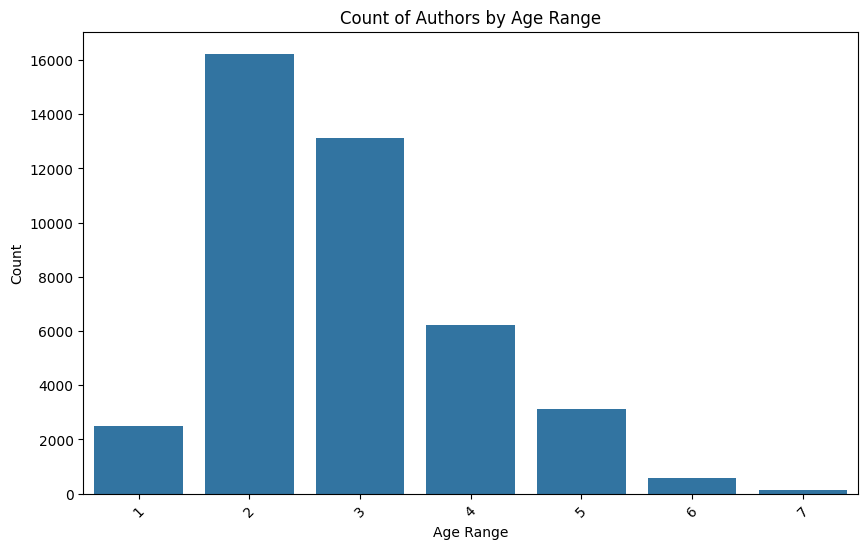

In [21]:
# Create a temporary DataFrame with unique authors
unique_authors = df_birthyear.loc[df_birthyear['auhtor_ID'].drop_duplicates().index]

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', data=df_birthyear)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Count of Authors by Age Range')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Preprocessing using nltk

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt_tab')
import contractions
import unicodedata
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zitag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zitag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [26]:
df_birthyear['clean_post'] = np.nan

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_post(post):
    words = word_tokenize(post.lower())
    words = [contractions.fix(word) for word in words]
    words = [unicodedata.normalize('NFKD', word).encode('ASCII', 'ignore').decode('utf-8') for word in words]
    words = [re.sub(r"(https|http)?:\S*", "", word) for word in words]
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return str(words)

tqdm.pandas()
df_birthyear['clean_post'] = df_birthyear['post'].progress_apply(clean_post)
df_birthyear.reset_index(drop=True, inplace=True)

100%|██████████| 41873/41873 [11:14<00:00, 62.08it/s]


In [27]:
df_birthyear.head()

,auhtor_ID,post,birth_year,age,age_range,clean_post
0,t2_9v6260me,a trope among this sub and almost everyone joi...,1948,73,7,"['trope', 'among', 'sub', 'almost', 'everyon',..."
1,t2_9v6260me,door question” decorated with an extreme helpi...,1948,73,7,"['door', 'question', 'decor', 'extrem', 'help'..."
2,t2_9v6260me,"Unless you live at home, why would you put up ...",1948,73,7,"['unless', 'live', 'home', 'would', 'put', 'ki..."
3,t2_9v6260me,my mind) any possibility of another religion b...,1948,73,7,"['mind', 'possibl', 'anoth', 'religion', 'wort..."
4,t2_9v6260me,and our mental health is linked to our physica...,1948,73,7,"['mental', 'health', 'link', 'physic', 'health..."


In [28]:
# to pickle
df_birthyear.to_pickle('df_birthyear.pkl')

## Function breakdown

In [29]:
i = random.randint(0, len(df_birthyear))
post = df_birthyear['post'][i]
print(post)

even when I'm on a cut. I realised these 3 things 1. I'm wayyyyy more active than them (more calories out) 2. I eat healthier, low calorie dense foods (less calories in) 3. I don't give a fuck what they eat, because I'm getting jacked and they aren't lmao. If you get judged who cares Have you tried steak and potatoes? I'd say about 20. How come you want to go down to 145 You look great, and will look a loooot better at 155, you'll be skinny as fuck at 145 160/65 by October is probably doable, but I honestly don't know enough about water cuts for weigh-ins and whatever. Maybe hire a coach? You only need 2-2.2g of protein per kg of bodyweight, and any protein you consume will be used for muscle building to an extent, even if its under that, just not optimal. 220g is probably way too high, so don't stress because 150g for your bodyweight is fine tbh The reason "diets fail" is because when people are done dieting, they immediately rebound back to their old diets, unhealthy foods, massive p

### Tokenization
split the sentence up in to smaller part, here it is split up into words

In [30]:
words = word_tokenize(post.lower())
print(words)

['even', 'when', 'i', "'m", 'on', 'a', 'cut', '.', 'i', 'realised', 'these', '3', 'things', '1.', 'i', "'m", 'wayyyyy', 'more', 'active', 'than', 'them', '(', 'more', 'calories', 'out', ')', '2.', 'i', 'eat', 'healthier', ',', 'low', 'calorie', 'dense', 'foods', '(', 'less', 'calories', 'in', ')', '3.', 'i', 'do', "n't", 'give', 'a', 'fuck', 'what', 'they', 'eat', ',', 'because', 'i', "'m", 'getting', 'jacked', 'and', 'they', 'are', "n't", 'lmao', '.', 'if', 'you', 'get', 'judged', 'who', 'cares', 'have', 'you', 'tried', 'steak', 'and', 'potatoes', '?', 'i', "'d", 'say', 'about', '20.', 'how', 'come', 'you', 'want', 'to', 'go', 'down', 'to', '145', 'you', 'look', 'great', ',', 'and', 'will', 'look', 'a', 'loooot', 'better', 'at', '155', ',', 'you', "'ll", 'be', 'skinny', 'as', 'fuck', 'at', '145', '160/65', 'by', 'october', 'is', 'probably', 'doable', ',', 'but', 'i', 'honestly', 'do', "n't", 'know', 'enough', 'about', 'water', 'cuts', 'for', 'weigh-ins', 'and', 'whatever', '.', 'maybe

### Removing all characters except letters

idea: maybe we should keep exclamantion/question marks and other characters, like ;) that could predict age potentially

In [31]:
words = [word for word in words if word.isalpha()]
print(words)

['even', 'when', 'i', 'on', 'a', 'cut', 'i', 'realised', 'these', 'things', 'i', 'wayyyyy', 'more', 'active', 'than', 'them', 'more', 'calories', 'out', 'i', 'eat', 'healthier', 'low', 'calorie', 'dense', 'foods', 'less', 'calories', 'in', 'i', 'do', 'give', 'a', 'fuck', 'what', 'they', 'eat', 'because', 'i', 'getting', 'jacked', 'and', 'they', 'are', 'lmao', 'if', 'you', 'get', 'judged', 'who', 'cares', 'have', 'you', 'tried', 'steak', 'and', 'potatoes', 'i', 'say', 'about', 'how', 'come', 'you', 'want', 'to', 'go', 'down', 'to', 'you', 'look', 'great', 'and', 'will', 'look', 'a', 'loooot', 'better', 'at', 'you', 'be', 'skinny', 'as', 'fuck', 'at', 'by', 'october', 'is', 'probably', 'doable', 'but', 'i', 'honestly', 'do', 'know', 'enough', 'about', 'water', 'cuts', 'for', 'and', 'whatever', 'maybe', 'hire', 'a', 'coach', 'you', 'only', 'need', 'of', 'protein', 'per', 'kg', 'of', 'bodyweight', 'and', 'any', 'protein', 'you', 'consume', 'will', 'be', 'used', 'for', 'muscle', 'building',

### Removing stopwords
Stopwords are frequently occurring words in a language that are frequently omitted from natural language processing (NLP) tasks due to their low significance for deciphering textual meaning. The particular list of stopwords can change based on the language being studied and the context. The following is a broad list of stopword categories:

*Common Stopwords*: These are the most frequently occurring words in a language and are often removed during text preprocessing. Examples include “the,” “is,” “in,” “for,” “where,” “when,” “to,” “at,” etc.

*Custom Stopwords*: Depending on the specific task or domain, additional words may be considered as stopwords. These could be domain-specific terms that don’t contribute much to the overall meaning. For example, in a medical context, words like “patient” or “treatment” might be considered as custom stopwords.

*Numerical Stopwords*: Numbers and numeric characters may be treated as stopwords in certain cases, especially when the analysis is focused on the meaning of the text rather than specific numerical values

*Single-Character Stopwords*: Single characters, such as “a,” “I,” “s,” or “x,” may be considered stopwords, particularly in cases where they don’t convey much meaning on their own.

*Contextual Stopwords*: Words that are stopwords in one context but meaningful in another may be considered as contextual stopwords. For instance, the word “will” might be a stopword in the context of general language processing but could be important in predicting future events.

In [32]:
words = [word for word in words if word not in stopwords.words('english')]  #removes english stopwords
print(words)

['even', 'cut', 'realised', 'things', 'wayyyyy', 'active', 'calories', 'eat', 'healthier', 'low', 'calorie', 'dense', 'foods', 'less', 'calories', 'give', 'fuck', 'eat', 'getting', 'jacked', 'lmao', 'get', 'judged', 'cares', 'tried', 'steak', 'potatoes', 'say', 'come', 'want', 'go', 'look', 'great', 'look', 'loooot', 'better', 'skinny', 'fuck', 'october', 'probably', 'doable', 'honestly', 'know', 'enough', 'water', 'cuts', 'whatever', 'maybe', 'hire', 'coach', 'need', 'protein', 'per', 'kg', 'bodyweight', 'protein', 'consume', 'used', 'muscle', 'building', 'extent', 'even', 'optimal', 'probably', 'way', 'high', 'stress', 'bodyweight', 'fine', 'tbh', 'reason', 'diets', 'fail', 'people', 'done', 'dieting', 'immediately', 'rebound', 'back', 'old', 'diets', 'unhealthy', 'foods', 'massive', 'portions', 'high', 'calorie', 'stuff', 'stick', 'healthy', 'foods', 'snack', 'junk', 'occasionally', 'wo', 'rebound', 'type', 'diet', 'matter', 'matters', 'calories', 'vs', 'calories', 'want', 'eat', 'l

In [33]:
word_freq = Counter(words)
print(word_freq.most_common(10))

[('eat', 12), ('like', 9), ('calories', 7), ('fat', 7), ('weight', 7), ('cals', 7), ('want', 6), ('way', 6), ('back', 6), ('diet', 6)]
